# **Telco Customers Churn Analysis and Predictive Models**

Khanh Tran

## 1. Research Objectives

1. Identifying the primary factors contributing to customer churn: This research aims to figure out the main factors that lead to consumers terminating the service by analyzing customer data and identifying trends. Being able to understand these characteristics facilitates the design of targeted interventions aimed at addressing the factors behind churn.
2. Investigating Feature Correlations and Customer Loyalty Tactics: Studying the correlation between different characteristics and turnover status will offer valuable insights into consumer behavior and preferences. The research will provide methods to boost client retention by concentrating on individualized products and enhanced service quality.
3. Create a dependable machine learning model for predicting customer churn. The project attempts to develop a prediction model using sophisticated machine learning techniques to reliably anticipate client attrition. The project aims to provide a strong tool for proactive churn control by evaluating different algorithms and enhancing model performance.

## 2. Data Understanding

In [59]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Read dataset
data = pd.read_csv('../01.Data/telecom_customer_churn.csv')

# Display the first five rows to understand about dataset
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [61]:
# Shape of dataset
data.shape

(7043, 38)

In [62]:
# Create a brief summary data table
data_summary = pd.DataFrame({
    "Unique Values" : data.nunique(),
    "Missing Values": data.isnull().sum(),
    'NaN Values': data.isna().sum(),
    'Duplicated' : data.duplicated().sum(),
    'Dtypes': data.dtypes
})

data_summary.transpose()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
Unique Values,7043,2,62,2,10,1106,1626,1626,1625,12,...,3,1591,6540,500,16,6068,6975,3,5,20
Missing Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5174,5174
NaN Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5174,5174
Duplicated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dtypes,object,object,int64,object,int64,object,int64,float64,float64,int64,...,object,float64,float64,float64,int64,float64,float64,object,object,object


In [63]:
# Summary statistics for numerical features
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


## 3. Exploratory Data Analysis

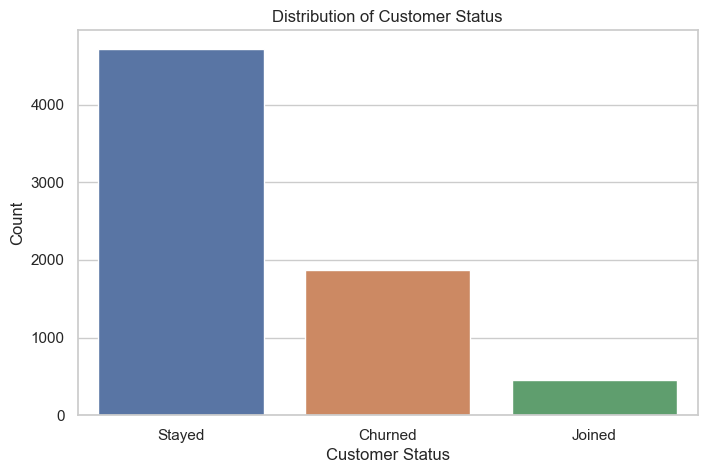

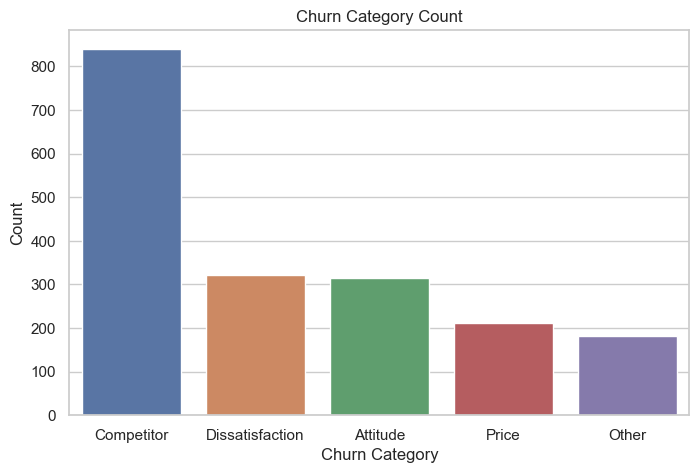

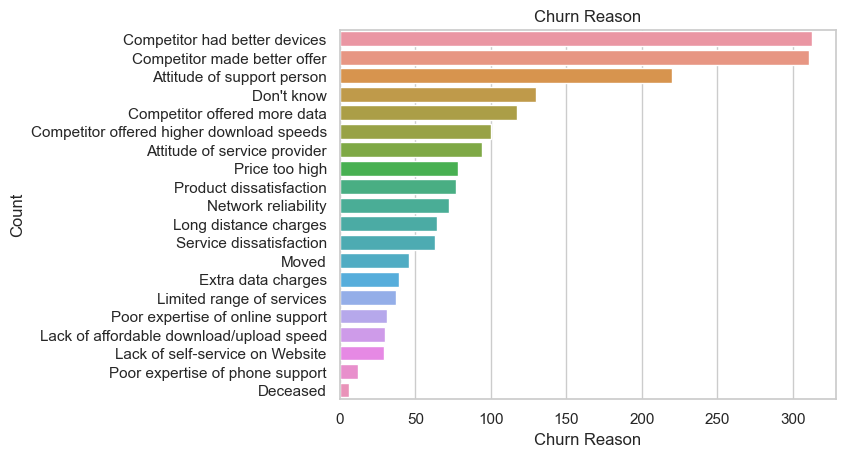

In [64]:
# Setting the aesthetics for plots
sns.set_theme(style="whitegrid")

# Visualizing the distribution of churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Status', data=data)
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

# Analyzing churn category
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn Category', data=data, order=data['Churn Category'].value_counts().index)
plt.title('Churn Category Count')
plt.xlabel('Churn Category')
plt.ylabel('Count')
plt.show()

# Analyzing churn reason
sns.countplot(data=data, y='Churn Reason', order=data['Churn Reason'].value_counts().index)
plt.title('Churn Reason')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.show()

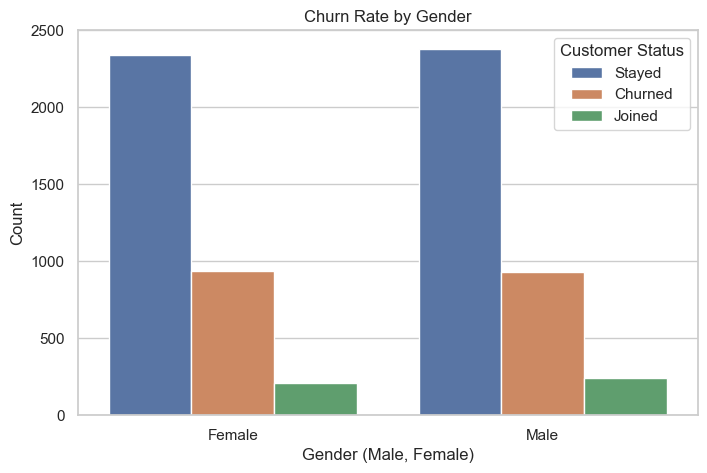

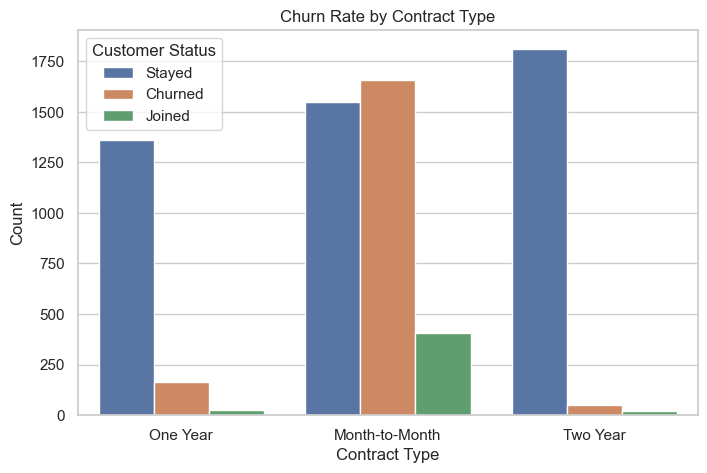

In [65]:
# Analyzing churn rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Customer Status', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (Male, Female)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

# Analyzing churn rate by contract type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Customer Status', data=data)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

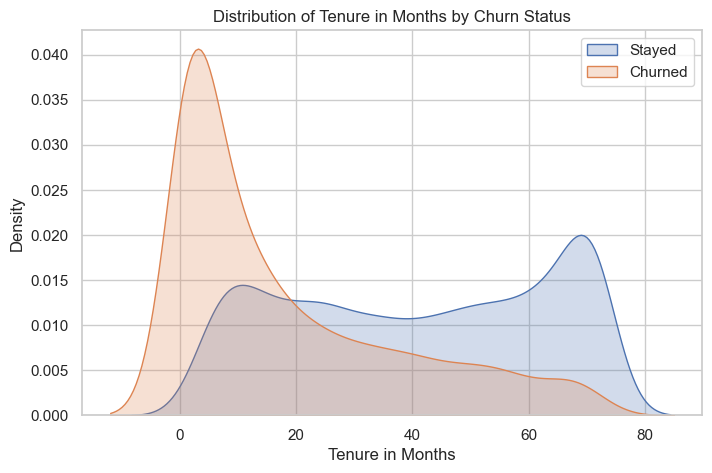

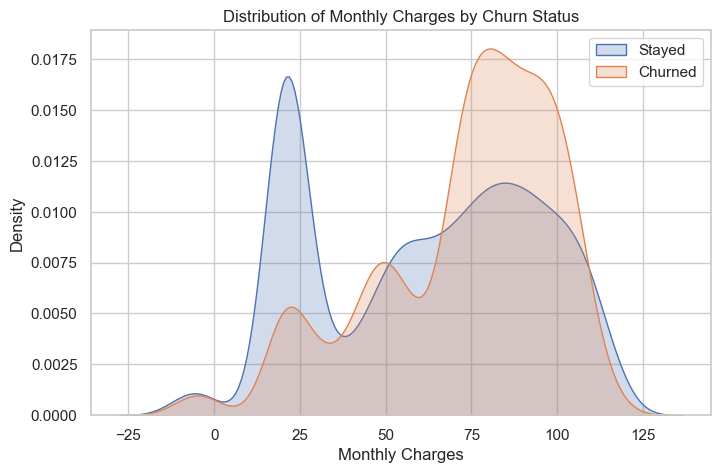

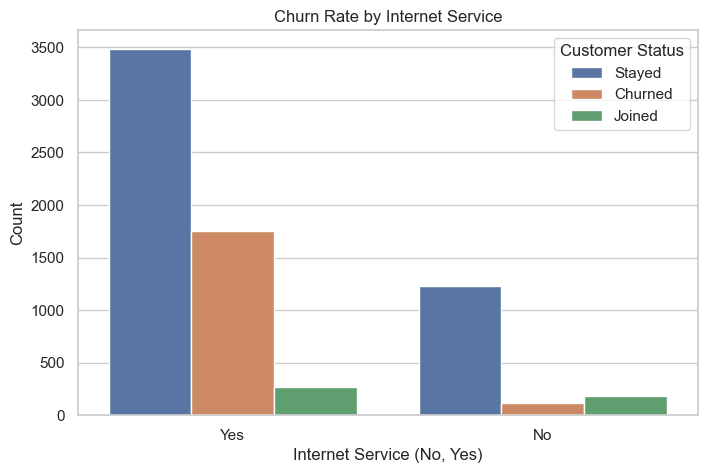

In [66]:
# Analyzing Tenure in Months vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Tenure in Months'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Tenure in Months'], label='Churned', fill=True)
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Monthly Charges vs. Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data[data['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
sns.kdeplot(data=data[data['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

# Analyzing Internet Service vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Service', hue='Customer Status', data=data)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service (No, Yes)')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

## 4. Data Preparation

#### 4.1 Handle Missing Values

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Remove unwanted columns
data = data.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude'])

# Fill missing values for categorical columns
categorical_fillna = {
    'Multiple Lines': 'No',
    'Internet Type': 'No',
    'Online Security': 'No',
    'Online Backup': 'No',
    'Device Protection Plan': 'No',
    'Premium Tech Support': 'No',
    'Streaming TV': 'No',
    'Streaming Movies': 'No',
    'Streaming Music': 'No',
    'Unlimited Data': 'No',
    'Churn Category': 'Not Churned',
    'Churn Reason': 'Not Churned'
}

data.fillna(categorical_fillna, inplace=True)

# Since 'Avg Monthly Long Distance Charges' and 'Avg Monthly GB Download' can be zero for non-subscribers, fill with 0
data['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
data['Avg Monthly GB Download'].fillna(0, inplace=True)

# Check missing values count after preprocessing
data.isnull().sum().sum()

0

#### 4.2 Encoding Categorical Variables

In [68]:
# # Encoding binary categorical variables manually
# binary_columns = ['Gender', 'Married', 'Phone Service', 'Paperless Billing']
# binary_mapping = {'Female': 1, 'Male': 0, 'Yes': 1, 'No': 0}

# for column in binary_columns:
#     if data[column].dtype == 'object':  # Only apply if the column is categorical
#         data[column] = data[column].map(binary_mapping)

In [69]:
# One hot encoding other categorical variables
ohe = OneHotEncoder(sparse_output=False)
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['Churn Category', 'Churn Reason', 'Customer Status'])

# Apply one-hot encoding and concatenate with the original data
for column in categorical_columns:
    # Perform one-hot encoding on the column
    encoded = ohe.fit_transform(data[[column]])
    # Create a DataFrame with the encoded variables
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{cat}" for cat in ohe.categories_[0]])
    # Drop the original column from 'data'
    data.drop(column, axis=1, inplace=True)
    # Concatenate the original data with the encoded DataFrame
    data = pd.concat([data, encoded_df], axis=1)


In [70]:
# Map Customer Status
data['Customer Status'] = data['Customer Status'].map({'Stayed': 1, 'Churned': 0, 'Joined': 2})
data['Customer Status'].values

data = data[data['Customer Status'] != 2]

In [71]:
data.drop(columns=['Churn Category', 'Churn Reason'], inplace=True)
# Save processed data
data.to_csv('../01.Data/telecom_customer_churn_processed.csv')

#### 4.3 Preparing the dataset for modeling

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using 'Customer Status' as the target variable
X = data.drop(columns=['Customer Status'])
y = data['Customer Status']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=6910)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5271, 56), (1318, 56), (5271,), (1318,))

In [73]:
# Apply SMOTE (Synthetic Minority Over-sampling Techinique) to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=6910)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote.shape, y_train_smote.shape

((7552, 56), (7552,))

<AxesSubplot: >

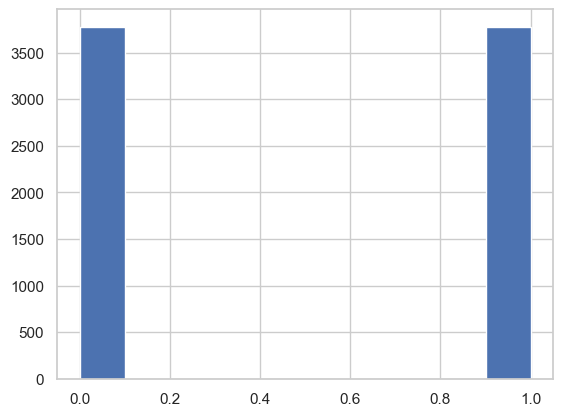

In [85]:
y_train_smote.hist()


### Build Model

In [76]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=6910),
    "Ridge Classifier": RidgeClassifier(random_state=6910),
    "SVC": SVC(random_state=6910),
    "LinearSVC": LinearSVC(max_iter=2000, random_state=6910),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=6910),
    "Random Forest": RandomForestClassifier(random_state=6910),
    "Gradient Boosting": GradientBoostingClassifier(random_state=6910),
    "AdaBoost Classifier": AdaBoostClassifier(algorithm="SAMME",random_state=6910),
    "Bagging Classifier": BaggingClassifier(random_state=6910),
    "MLP Classifier": MLPClassifier(max_iter=1000, random_state=6910)
}



# Dictionary to hold model scores
model_scores = {}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
       
    # Calculating scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    
    # Storing scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Displaying model scores
model_scores_df = pd.DataFrame(model_scores).T
model_scores_df.sort_values('Accuracy', ascending=False)


c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1 Score
Gradient Boosting,0.874052,0.853351,0.828931,0.839719
Random Forest,0.862671,0.839528,0.812914,0.824448
AdaBoost Classifier,0.860395,0.832756,0.816975,0.824206
Logistic Regression,0.858877,0.825934,0.828024,0.826967
Ridge Classifier,0.848255,0.813344,0.813344,0.813344
Bagging Classifier,0.846737,0.810433,0.816321,0.813267
MLP Classifier,0.838392,0.799603,0.812916,0.805645
Decision Tree,0.810319,0.766476,0.776367,0.771023
GaussianNB,0.805008,0.768604,0.811407,0.780173
KNeighbors Classifier,0.794385,0.752315,0.713581,0.727494


In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Number of splits for cross-validation
n_splits = 5

# Stratified k-Fold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=6910)

# Dictionary to hold cross-validation scores
cv_scores = {name: {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []} for name in models.keys()}

# Cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    for name, model in models.items():
        # Create a pipeline with scaling and model
        pipeline = make_pipeline(StandardScaler(), model)
        
        # Fit the model on the training fold
        pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = pipeline.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        precision = precision_score(y_val_fold, y_val_pred, average='macro')
        recall = recall_score(y_val_fold, y_val_pred, average='macro')
        f1 = f1_score(y_val_fold, y_val_pred, average='macro')
        
        # Store the scores
        cv_scores[name]["Accuracy"].append(accuracy)
        cv_scores[name]["Precision"].append(precision)
        cv_scores[name]["Recall"].append(recall)
        cv_scores[name]["F1 Score"].append(f1)

# Calculate the average scores from cross-validation
for name in cv_scores.keys():
    for metric in cv_scores[name].keys():
        cv_scores[name][metric] = sum(cv_scores[name][metric]) / n_splits

# Display cross-validation scores
cv_scores_df = pd.DataFrame(cv_scores).T
print("Cross-validation Scores:")
print(cv_scores_df.sort_values('Accuracy', ascending=False))

# Now, train the models on the entire training set and evaluate on the test set
model_scores = {}

for name, model in models.items():
    # Create a pipeline with scaling and model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Fit the model on the entire training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Display test set scores
model_scores_df = pd.DataFrame(model_scores).T
print("\nTest Set Scores:")
print(model_scores_df.sort_values('Accuracy', ascending=False))


c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation Scores:
                       Accuracy  Precision    Recall  F1 Score
Gradient Boosting      0.875166   0.857110  0.827209  0.839930
Random Forest          0.867198   0.851178  0.810737  0.827052
AdaBoost Classifier    0.863970   0.839719  0.818384  0.827631
Bagging Classifier     0.856004   0.824175  0.819895  0.821743
Logistic Regression    0.853535   0.820204  0.819184  0.819549
LinearSVC              0.850120   0.815503  0.817002  0.816053
SVC                    0.849742   0.820153  0.801988  0.809955
Ridge Classifier       0.844997   0.812928  0.799283  0.805192
MLP Classifier         0.831531   0.793282  0.790288  0.791540
Decision Tree          0.826029   0.786129  0.786651  0.786121
GaussianNB             0.804967   0.765637  0.801446  0.776891
KNeighbors Classifier  0.794533   0.748312  0.762445  0.754192


c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Test Set Scores:
                       Accuracy  Precision    Recall  F1 Score
Gradient Boosting      0.874052   0.895325  0.933263  0.913900
Random Forest          0.861912   0.884848  0.927966  0.905895
AdaBoost Classifier    0.860395   0.890947  0.917373  0.903967
Logistic Regression    0.854325   0.901709  0.894068  0.897872
LinearSVC              0.854325   0.904301  0.890890  0.897545
Ridge Classifier       0.848255   0.894068  0.894068  0.894068
Bagging Classifier     0.846737   0.898069  0.886653  0.892324
SVC                    0.845979   0.886340  0.900424  0.893326
MLP Classifier         0.817906   0.874468  0.870763  0.872611
Decision Tree          0.810319   0.877174  0.854873  0.865880
GaussianNB             0.807284   0.919708  0.800847  0.856172
KNeighbors Classifier  0.795903   0.883087  0.824153  0.852603


In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Number of splits for cross-validation
n_splits = 5

# Stratified k-Fold for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=6910)

# Dictionary to hold cross-validation scores
cv_scores = {name: {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []} for name in models.keys()}

# Cross-validation
for train_index, val_index in skf.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[val_index]
    y_train_fold, y_val_fold = y_train_smote.iloc[train_index], y_train_smote.iloc[val_index]
    
    for name, model in models.items():
        # Create a pipeline with scaling and model
        pipeline = make_pipeline(StandardScaler(), model)
        
        # Fit the model on the training fold
        pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation fold
        y_val_pred = pipeline.predict(X_val_fold)
        
        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_val_pred)
        precision = precision_score(y_val_fold, y_val_pred, average='macro')
        recall = recall_score(y_val_fold, y_val_pred, average='macro')
        f1 = f1_score(y_val_fold, y_val_pred, average='macro')
        
        # Store the scores
        cv_scores[name]["Accuracy"].append(accuracy)
        cv_scores[name]["Precision"].append(precision)
        cv_scores[name]["Recall"].append(recall)
        cv_scores[name]["F1 Score"].append(f1)

# Calculate the average scores from cross-validation
for name in cv_scores.keys():
    for metric in cv_scores[name].keys():
        cv_scores[name][metric] = sum(cv_scores[name][metric]) / n_splits

# Display cross-validation scores
cv_scores_df = pd.DataFrame(cv_scores).T
print("Cross-validation Scores:")
print(cv_scores_df.sort_values('Accuracy', ascending=False))

# Now, train the models on the entire training set and evaluate on the test set
model_scores = {}

for name, model in models.items():
    # Create a pipeline with scaling and model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Fit the model on the entire training set
    pipeline.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Store the scores
    model_scores[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

# Display test set scores
model_scores_df = pd.DataFrame(model_scores).T
print("\nTest Set Scores:")
print(model_scores_df.sort_values('Accuracy', ascending=False))


c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cross-validation Scores:
                       Accuracy  Precision    Recall  F1 Score
Gradient Boosting      0.913268   0.913524  0.913267  0.913254
Random Forest          0.911679   0.912290  0.911679  0.911647
Bagging Classifier     0.896583   0.896775  0.896582  0.896570
AdaBoost Classifier    0.891682   0.891980  0.891682  0.891660
MLP Classifier         0.889964   0.890476  0.889963  0.889928
SVC                    0.885725   0.886741  0.885724  0.885647
Decision Tree          0.864009   0.864053  0.864009  0.864005
Logistic Regression    0.852090   0.854254  0.852093  0.851855
LinearSVC              0.850765   0.853787  0.850767  0.850433
Ridge Classifier       0.838186   0.842715  0.838187  0.837635
GaussianNB             0.822429   0.822518  0.822429  0.822416
KNeighbors Classifier  0.810380   0.834350  0.810380  0.806911


c:\KhanhTV5\GitHub\Repos\.venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Test Set Scores:
                       Accuracy  Precision    Recall  F1 Score
Gradient Boosting      0.873293   0.906806  0.917373  0.912059
Random Forest          0.859636   0.890834  0.916314  0.903394
AdaBoost Classifier    0.857360   0.913567  0.884534  0.898816
SVC                    0.831563   0.900222  0.860169  0.879740
Bagging Classifier     0.830046   0.893013  0.866525  0.879570
Decision Tree          0.819423   0.884532  0.860169  0.872180
Logistic Regression    0.814871   0.933168  0.798729  0.860731
LinearSVC              0.812595   0.936170  0.792373  0.858290
MLP Classifier         0.812595   0.864921  0.875000  0.869932
GaussianNB             0.806525   0.908660  0.811441  0.857303
Ridge Classifier       0.798938   0.941482  0.766949  0.845301
KNeighbors Classifier  0.724583   0.930370  0.665254  0.775788


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid setup
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Grid Search CV
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

# Gradient Boosting Grid Search CV
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
gb_grid_search.fit(X_train_scaled, y_train)

# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_
gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

rf_best_params, rf_best_score, gb_best_params, gb_best_score


In [ ]:
# # Corrected Data Preprocessing
# # Dropping rows with NaN values to simplify
# data_cleaned = data.dropna()

# # Selecting numerical features and target for the simplified example
# X = data_cleaned.select_dtypes(include=['number']).drop(columns=['Customer Status'])
# y = data_cleaned['Customer Status']

# # Splitting the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scaling the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Hyperparameter grids
gb_grid = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 5]}
ada_grid = {'n_estimators': [50, 100], 'learning_rate': [0.1, 1.0]}
rf_grid = {'n_estimators': [100, 200], 'max_depth': [10, None], 'min_samples_split': [2, 10]}
bagging_grid = {'n_estimators': [10, 50], 'max_samples': [0.5, 1.0]}
dt_grid = {'max_depth': [None, 10], 'min_samples_split': [2, 10]}

# Grid search setup for each model
grids = {
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), gb_grid),
    "AdaBoost": (AdaBoostClassifier(random_state=42), ada_grid),
    "Random Forest": (RandomForestClassifier(random_state=42), rf_grid),
    "Bagging Classifier": (BaggingClassifier(random_state=42), bagging_grid),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), dt_grid)
}

# Dictionary to hold best parameters for each model
best_params = {}

# Performing grid search
for model_name, (model, grid) in grids.items():
    grid_search = GridSearchCV(model, grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_params[model_name] = grid_search.best_params_

best_params
